In [1]:
import random #used to generate random data
import csv #used to write data to a csv file

import pandas as pd #used for data manipulation and analysis
from sklearn.model_selection import train_test_split #used to split data into training and testing sets

import matplotlib.pyplot as plt #used for data visualization

#load data into pandas frame
data=pd.read_csv('randomdata.csv')
print(data)

print(data.head()) #display first 5 rows of the data




     PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0             1           1           1           0           0           0   
1             0           0           0           0           0           0   
2             1           1           1           0           0           0   
3             1           1           1           0           0           0   
4             0           0           0           0           0           0   
..          ...         ...         ...         ...         ...         ...   
573           1           1           1           0           0           0   
574           1           1           0           0           0           0   
575           1           1           1           0           0           0   
576           1           1           0           0           0           0   
577           1           1           0           0           0           0   

     PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9

In [2]:
df=pd.DataFrame(data) #convert data to pandas dataframe

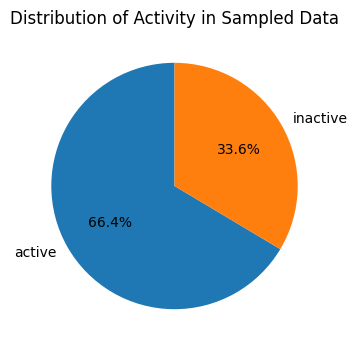

In [ ]:
# Perform sampling (50% of the data)
sampled_df = df.sample(frac=0.5, random_state=1) # Set random_state for reproducibility

# Create a pie chart of the "Activity" column
activity_counts = sampled_df['Activity'].value_counts() # Count occurrences of each activity
plt.figure(figsize=(4, 4)) # Set figure size for better visibility
# Create pie chart
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=90) # Autopct formats the percentage display
plt.title('Distribution of Activity in Sampled Data')
plt.show()


In [ ]:
sampled_df = df.sample(frac=0.5, random_state=1) # Set random_state for reproducibility


# Show the sampled data
print(sampled_df)


     PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
192           0           0           0           0           0           0   
419           1           1           1           0           0           0   
350           1           1           1           0           0           0   
410           0           0           0           0           0           0   
480           1           1           1           0           0           0   
..          ...         ...         ...         ...         ...         ...   
143           1           1           1           0           0           0   
312           1           1           1           0           0           0   
14            0           0           0           0           0           0   
544           1           1           1           0           0           0   
442           1           1           1           0           0           0   

     PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9

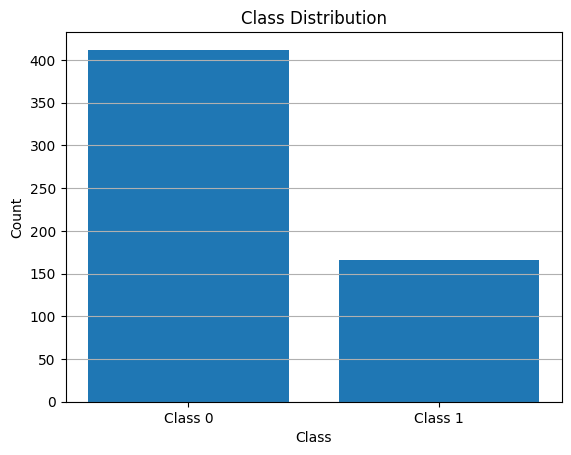

In [5]:
import matplotlib.pyplot as plt # Create a bar chart of the "Activity" column

import pandas as pd # Load the data into a pandas DataFrame
data = pd.read_csv('randomdata.csv')
x=data.drop(["Activity"],axis=1) # Drop the "Activity" column to get features
# Split the data into training and testing sets (80% train, 20% test)
y=data["Activity"] # Get the target variable

count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values) # Create a bar chart of class counts
# Set labels and title for the bar chart
plt.xlabel('Class') # Set x-axis label
plt.ylabel('Count') # Set y-axis label
# Set title and x-ticks for the bar chart
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Class 0', 'Class 1']) # Set x-ticks to class labels means 0 and 1
plt.grid(axis='y') # Add grid lines for better readability
plt.show()


In [6]:
x = data.iloc[:,:-1].values #it contains all columns except the last one
y = data.iloc[:,-1].values #it contains the last column only

In [7]:
from imblearn.under_sampling import RandomUnderSampler # Import RandomUnderSampler from imbalanced-learn
# Create an instance of RandomUnderSampler with a sampling strategy of 1 (equal class distribution)
rs = RandomUnderSampler(sampling_strategy=1) # Create an instance of RandomUnderSampler with a sampling strategy of 1 (equal class distribution)
# Fit and resample the data using RandomUnderSampler
x_rs, y_rs = rs.fit_resample(x,y)

In [8]:
y_rs=pd.Series(y_rs) # Convert the resampled target variable to a pandas Series
# Count the occurrences of each class in the resampled target variable

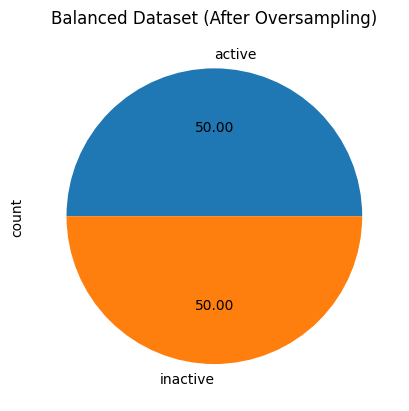

In [ ]:
a1 = y_rs.value_counts().plot.pie(autopct='%.2f') #autopct formats the percentage display
# Create a pie chart of the resampled target variable
_ =   a1.set_title('Balanced Dataset (After Oversampling)')

In [10]:
from collections import Counter 
#The Counter class from Python's collections module is used to count occurrences of elements in an iterable
#  (e.g., list, string) and returns a dictionary-like object with elements as keys and their counts as values.

from sklearn.datasets import make_classification 
#The make_classification function in scikit-learn is used to generate a synthetic dataset for binary or multiclass classification problems. 
# It is particularly useful for creating datasets for testing machine learning mode

In [11]:
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42) # Generate a synthetic dataset with 2 classes, 20 features, and 1000 samples
# Count the occurrences of each class in the generated dataset


In [12]:
from imblearn.over_sampling import SMOTE # Import SMOTE from imbalanced-learn
# Create an instance of SMOTE (Synthetic Minority Over-sampling Technique)
ios = SMOTE() # Create an instance of SMOTE (Synthetic Minority Over-sampling Technique)
X_res, y_res = ios.fit_resample(X, y) # Fit and resample the data using SMOTE

y_res=pd.Series(y_res) # Convert the resampled target variable to a pandas Series
# Count the occurrences of each class in the resampled target variable

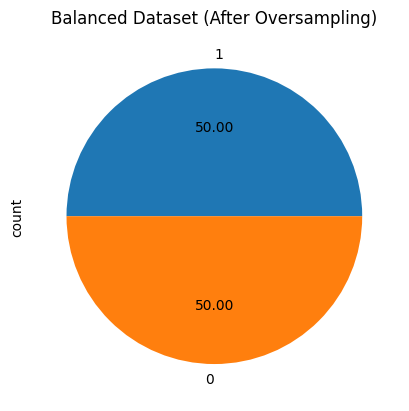

In [13]:
a1 = y_res.value_counts().plot.pie(autopct='%.2f') # Create a pie chart of the resampled target variable
_ = a1.set_title('Balanced Dataset (After Oversampling)') # Set title for the pie chart